In [4]:
import numpy as np
from PIL import Image
import cv2
import os
import sys
app_dir_path = os.path.dirname(os.path.dirname(os.path.abspath('__filename__')))+'/ocr_app'
sys.path.append(app_dir_path + '/crnn_ctc')
from ocr.model import predict as ocr_predict

Using TensorFlow backend.


In [41]:
def adjusted(img_path):
	# 灰度
	raw = cv2.imread(img_path, 0)
	ret, mask = cv2.threshold(raw, 127, 255, cv2.THRESH_BINARY)
	# 获取黑色像素坐标
	coords = np.column_stack(np.where(mask == 0))
	# 计算旋转角度
	angle = cv2.minAreaRect(coords)[-1]
	if angle < -45:
		angle = -(90+ angle)
	else:
		angle = -angle
	h, w = mask.shape[:2]
	center = (w//2, h//2)
	# 获取旋转矩阵
	M = cv2.getRotationMatrix2D(center, angle, 1.0)
	# 旋转
	rotated = cv2.warpAffine(cv2.imread(img_path), M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

	cv2.imwrite(img_path + '_adjusted.jpg', rotated)
	return img_path + '_adjusted.jpg'

def cut(img_path):
    raw = cv2.imread(img_path,0)
    _, data = cv2.threshold(raw,127,255,cv2.THRESH_BINARY)
    l = []
    _ = 0
    for i in range(data.shape[0]):
        t = sum(map(lambda x: 0 if x == 255 else 1, data[i]))
        if t > 0 and _ == 0:
            l.append(i)
        elif t == 0 and _ > 0:
            l.append(i)
        _ = t
    if _ != 0:
        l.append(data.shape[0] - 1)
    
    line_data=[]
    for i in range(len(l) // 2):
        line_data.append(raw[l[2 * i]:l[2 * i + 1],:])
    return line_data

def my_ocr(img_path):
	img_path = adjusted(img_path)

	cuts = cut(img_path)

	cnt = 0
	result = {}
	if not os.path.exists(app_dir_path + '/tmp_cut'):
		os.mkdir(app_dir_path + '/tmp_cut')
	for i, img in enumerate(cuts):
		img = Image.fromarray(img).convert('L')
		txt = ocr_predict(img)
		result[i] = txt
		file_name=img_path.split('/')[-1]
		img.save(f'{app_dir_path}/tmp_cut/{file_name}_{i}.png')

	return result

In [11]:
img_path='advancedeast/demo/'+'test1.png'
img_path = app_dir_path+'/'+img_path

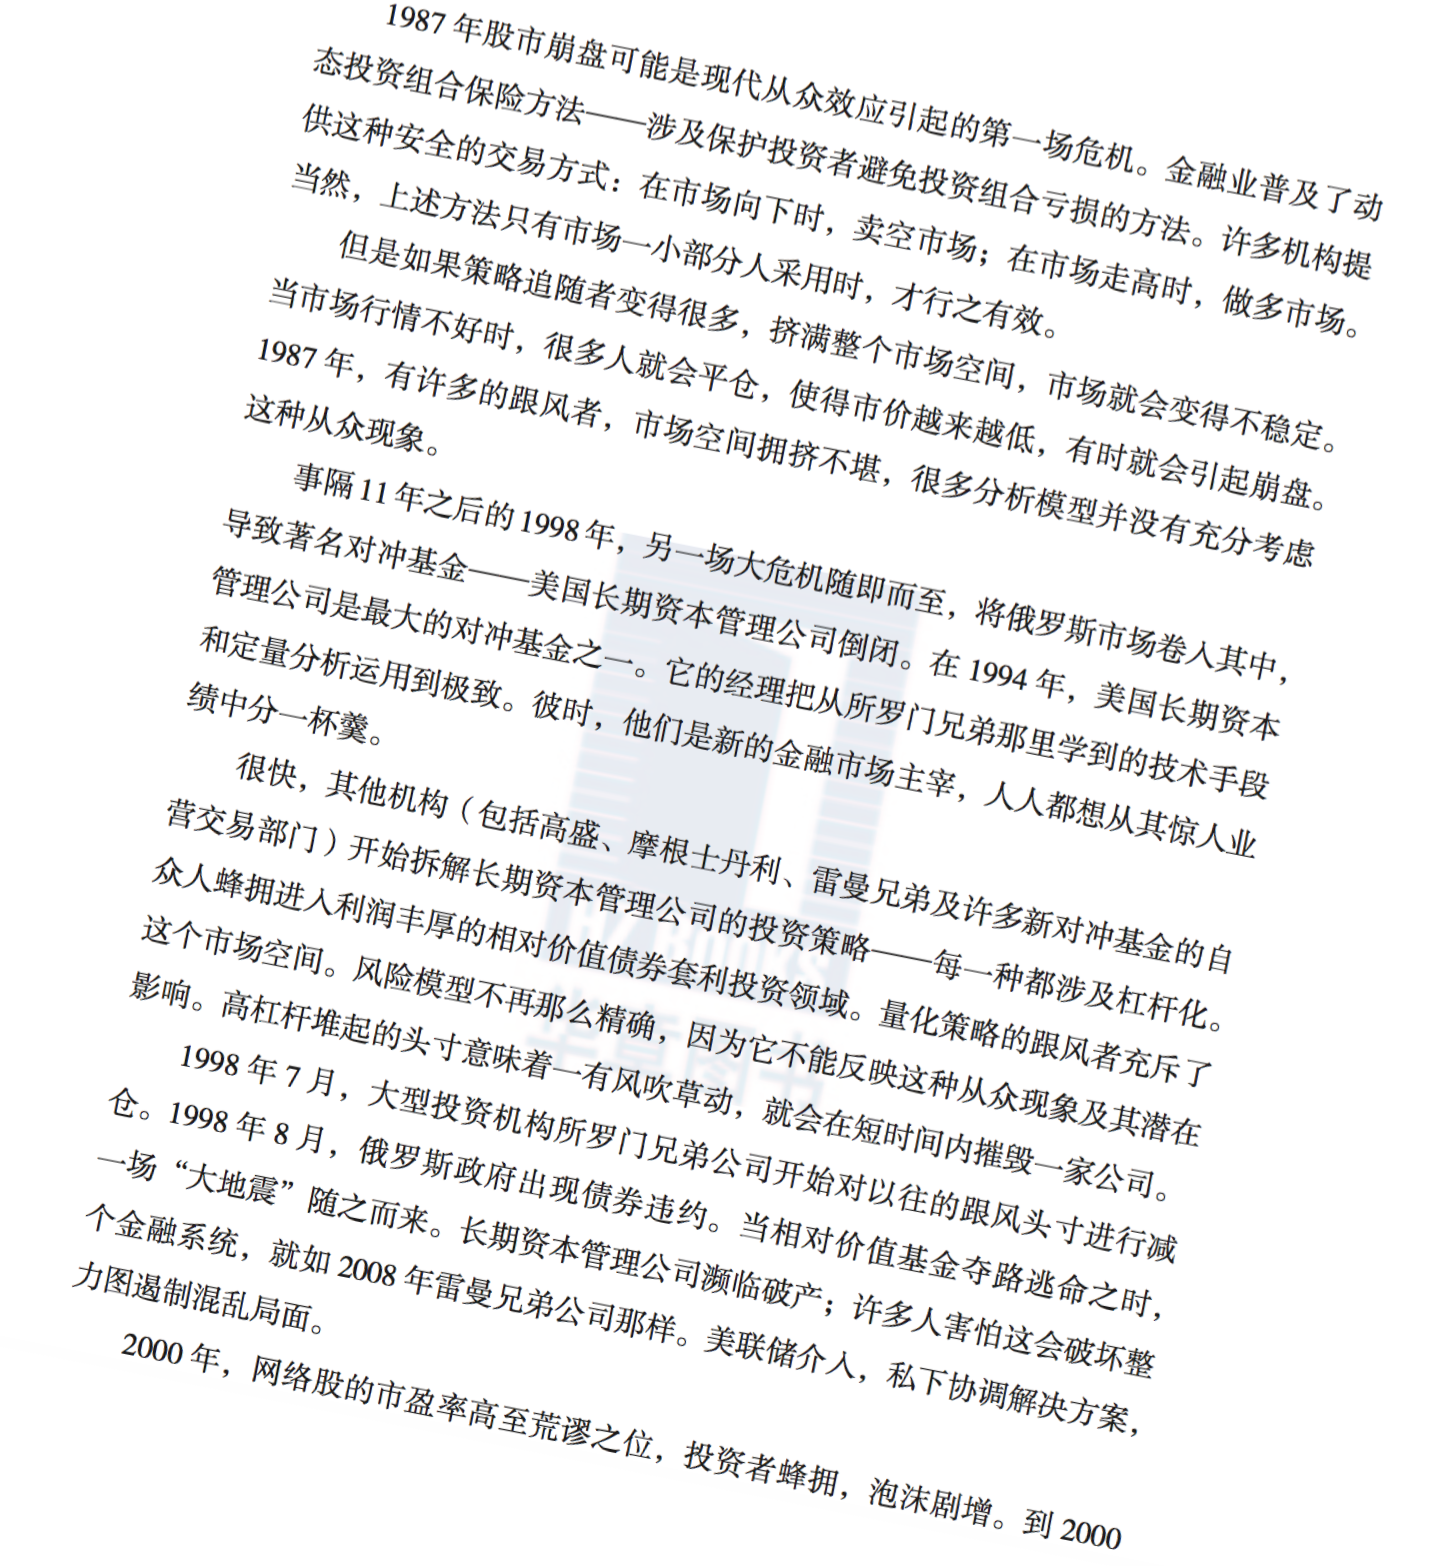

In [34]:
Image.open(img_path)

In [42]:
my_ocr(img_path)

{0: ':1087年股市瘸盎可能是现代从众效应亏起的第一场危机。金融业普及了动',
 1: ':态投资组合傈险方法   涉及傈护投资者避免投资组合亏损的方法。许多机构提',
 2: ':代这种安全的交易方式:在市场向下时，卖空市场;在市场走高时，做多市场。',
 3: ':当然，上述方法只有市场一小部分人采用时，才行之有效。',
 4: ':但是如果策路追随者变得很多，挤满鲶个市场空间，市场就会变得不稳定。',
 5: ':当市场行情不好时，很多人就会平仓，使得市价越来越低，有时就会亏I起瘸盎。',
 6: '1987年，有许多的眼风者，市场空间拥挤不堪，很多分析嫉型并没有充分考虑',
 7: '这种从众现象。',
 8: '事11年之后的1908年，另一场大危机陂即而至，将俄罗斯市场卷人其中,',
 9: '导致著绍对冲基金   美国长期资本管理公司倒闭。在1004年，美国长期资本',
 10: ':管理公司是最大的对冲基金之一。它的经理把从所罗门]兄弟科里学到的技术手段',
 11: '和定量分析运用到极致。彼时，他们是新的金融市场主宰，人人都椤从其惊人业',
 12: ':绩中分一杯驽。',
 13: '很快，其他机构 包括高廖、廖根士忖利、管晏兄弟及许多新对冲基金的自',
 14: ':营交易部门]>开始拆解长期资本管理公司的投资策略   每一种都汴及汇杆化。',
 15: '众人蜂拥进人利润丰厚的相对价值傍券委利投资领域。量化策路的跟风者充斥了',
 16: '这个市场空间。风险模型不再那么将确，因为它不能反腴这科从众现象及其潜在',
 17: '影响。高杠杆堆起的头寸意味着一有风吹草动，就会在短时间内摧毁一家公司]。',
 18: '1908年7月，大型投资机构所罗门]兄弟公司开始对以往的跟风头寸进行诚',
 19: ':企。1008年8月，俄罗斯政府出现债券违绚。当相对价值基金夺路逃命之时，',
 20: ':一场“大地震”随之而来。长期资本管理公司濒临破产;许多人害怕这会破坏整',
 21: '个金融系统，就如2008年雷晏兄弟公司那样。美联傍介人，私下协调解决方案，',
 22: ':力图退制混乱局面。',
 23: ':2000年，网络股的市盈率高至荒谬之位，投资者鲶捌，泡汴剧增。到2000'}

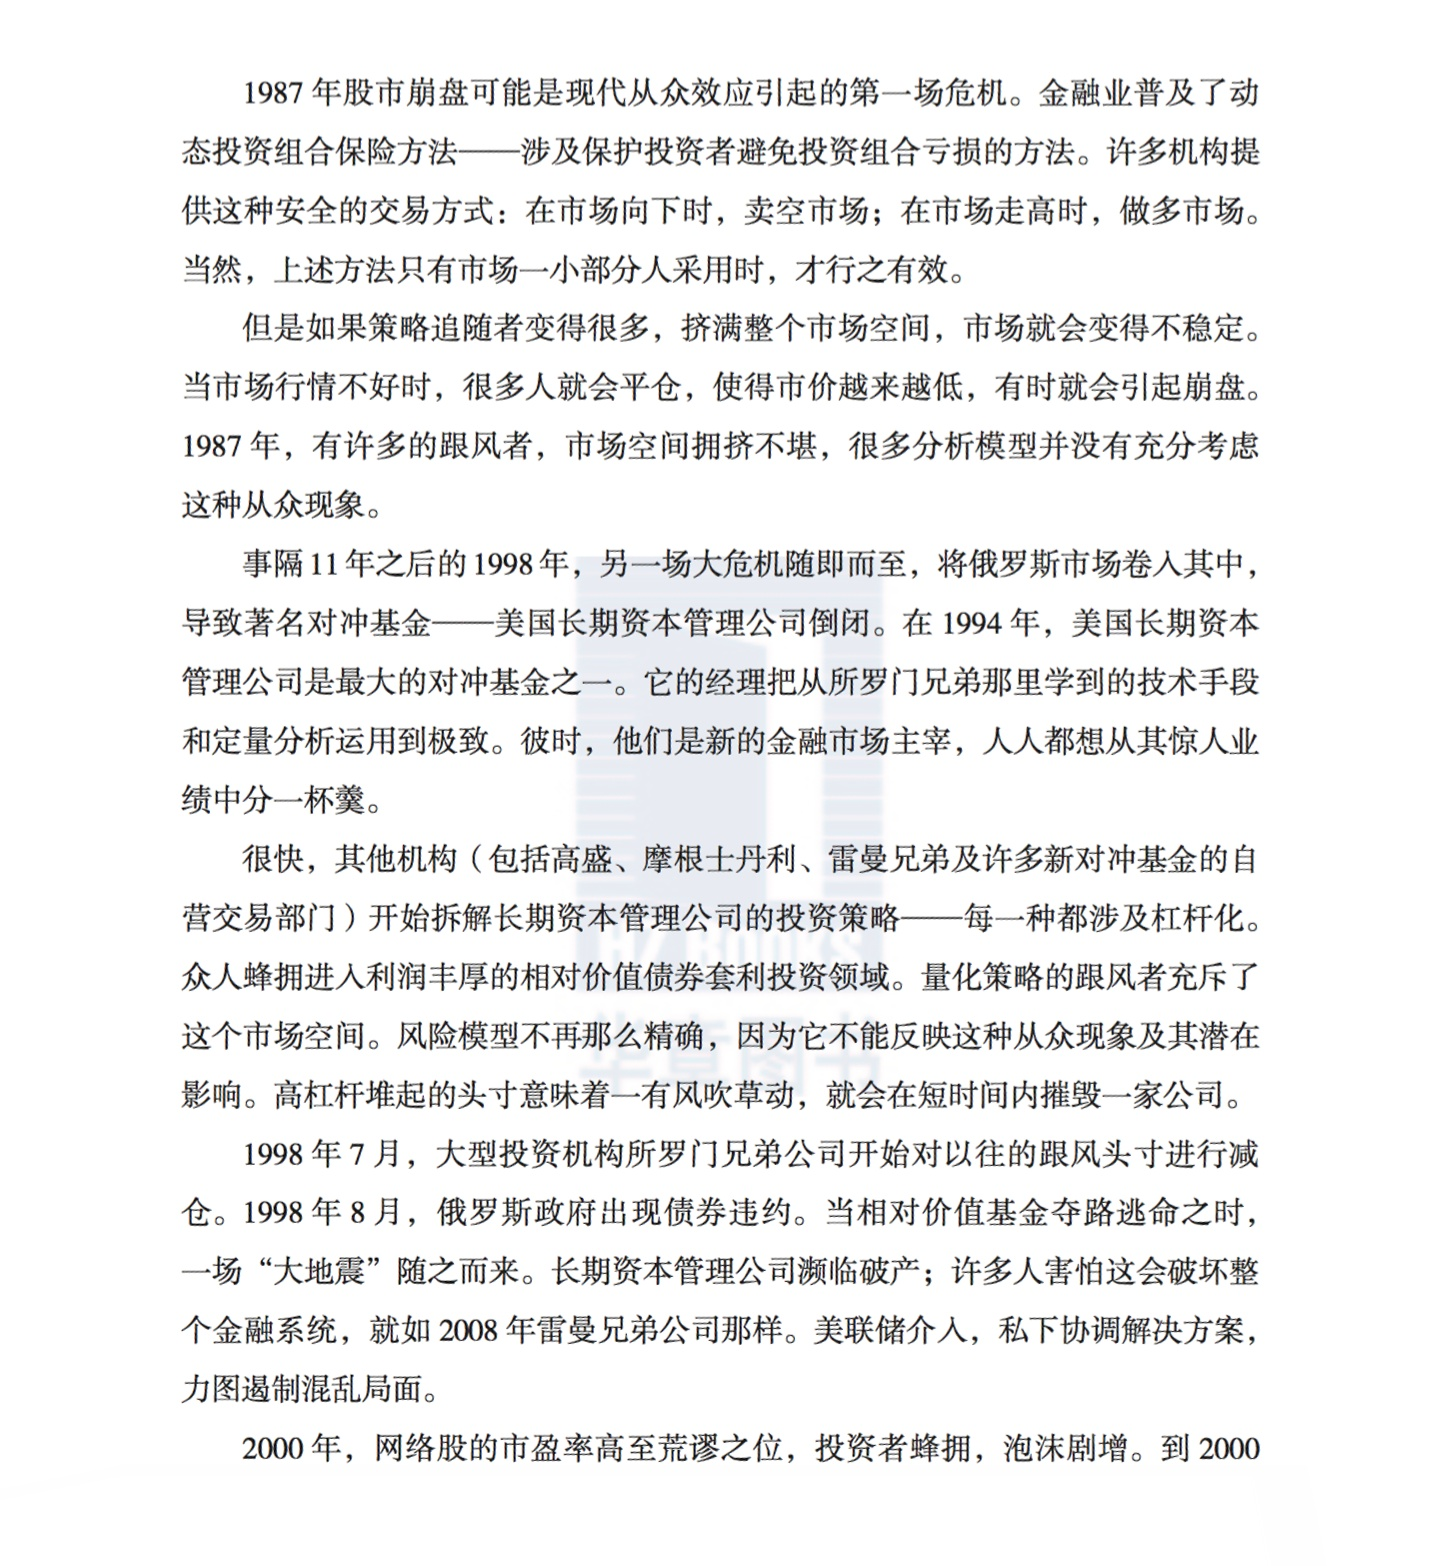

In [20]:
Image.open(img_path+'_adjusted.jpg')

In [43]:
r={0: ':1087年股市瘸盎可能是现代从众效应亏起的第一场危机。金融业普及了动',
 1: ':态投资组合傈险方法   涉及傈护投资者避免投资组合亏损的方法。许多机构提',
 2: ':代这种安全的交易方式:在市场向下时，卖空市场;在市场走高时，做多市场。',
 3: ':当然，上述方法只有市场一小部分人采用时，才行之有效。',
 4: ':但是如果策路追随者变得很多，挤满鲶个市场空间，市场就会变得不稳定。',
 5: ':当市场行情不好时，很多人就会平仓，使得市价越来越低，有时就会亏I起瘸盎。',
 6: '1987年，有许多的眼风者，市场空间拥挤不堪，很多分析嫉型并没有充分考虑',
 7: '这种从众现象。',
 8: '事11年之后的1908年，另一场大危机陂即而至，将俄罗斯市场卷人其中,',
 9: '导致著绍对冲基金   美国长期资本管理公司倒闭。在1004年，美国长期资本',
 10: ':管理公司是最大的对冲基金之一。它的经理把从所罗门]兄弟科里学到的技术手段',
 11: '和定量分析运用到极致。彼时，他们是新的金融市场主宰，人人都椤从其惊人业',
 12: ':绩中分一杯驽。',
 13: '很快，其他机构 包括高廖、廖根士忖利、管晏兄弟及许多新对冲基金的自',
 14: ':营交易部门]>开始拆解长期资本管理公司的投资策略   每一种都汴及汇杆化。',
 15: '众人蜂拥进人利润丰厚的相对价值傍券委利投资领域。量化策路的跟风者充斥了',
 16: '这个市场空间。风险模型不再那么将确，因为它不能反腴这科从众现象及其潜在',
 17: '影响。高杠杆堆起的头寸意味着一有风吹草动，就会在短时间内摧毁一家公司]。',
 18: '1908年7月，大型投资机构所罗门]兄弟公司开始对以往的跟风头寸进行诚',
 19: ':企。1008年8月，俄罗斯政府出现债券违绚。当相对价值基金夺路逃命之时，',
 20: ':一场“大地震”随之而来。长期资本管理公司濒临破产;许多人害怕这会破坏整',
 21: '个金融系统，就如2008年雷晏兄弟公司那样。美联傍介人，私下协调解决方案，',
 22: ':力图退制混乱局面。',
 23: ':2000年，网络股的市盈率高至荒谬之位，投资者鲶捌，泡汴剧增。到2000'}
for v in r.values():
    print(v)

:1087年股市瘸盎可能是现代从众效应亏起的第一场危机。金融业普及了动
:态投资组合傈险方法   涉及傈护投资者避免投资组合亏损的方法。许多机构提
:代这种安全的交易方式:在市场向下时，卖空市场;在市场走高时，做多市场。
:当然，上述方法只有市场一小部分人采用时，才行之有效。
:但是如果策路追随者变得很多，挤满鲶个市场空间，市场就会变得不稳定。
:当市场行情不好时，很多人就会平仓，使得市价越来越低，有时就会亏I起瘸盎。
1987年，有许多的眼风者，市场空间拥挤不堪，很多分析嫉型并没有充分考虑
这种从众现象。
事11年之后的1908年，另一场大危机陂即而至，将俄罗斯市场卷人其中,
导致著绍对冲基金   美国长期资本管理公司倒闭。在1004年，美国长期资本
:管理公司是最大的对冲基金之一。它的经理把从所罗门]兄弟科里学到的技术手段
和定量分析运用到极致。彼时，他们是新的金融市场主宰，人人都椤从其惊人业
:绩中分一杯驽。
很快，其他机构 包括高廖、廖根士忖利、管晏兄弟及许多新对冲基金的自
:营交易部门]>开始拆解长期资本管理公司的投资策略   每一种都汴及汇杆化。
众人蜂拥进人利润丰厚的相对价值傍券委利投资领域。量化策路的跟风者充斥了
这个市场空间。风险模型不再那么将确，因为它不能反腴这科从众现象及其潜在
影响。高杠杆堆起的头寸意味着一有风吹草动，就会在短时间内摧毁一家公司]。
1908年7月，大型投资机构所罗门]兄弟公司开始对以往的跟风头寸进行诚
:企。1008年8月，俄罗斯政府出现债券违绚。当相对价值基金夺路逃命之时，
:一场“大地震”随之而来。长期资本管理公司濒临破产;许多人害怕这会破坏整
个金融系统，就如2008年雷晏兄弟公司那样。美联傍介人，私下协调解决方案，
:力图退制混乱局面。
:2000年，网络股的市盈率高至荒谬之位，投资者鲶捌，泡汴剧增。到2000
